<a href="https://colab.research.google.com/github/polo-music/MONEY-FLOW-INDEX/blob/main/Money_Flow_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

#cargamos database
url = 'https://raw.githubusercontent.com/polo-music/MONEY-FLOW-INDEX/main/TUB.MC.csv'

df = pd.read_csv(url)
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

df

,Date,Open,High,Low,Close,Adj Close,Volume
2018-02-05,2018-02-05,3.345,3.410,3.300,3.395,3.338475,303423.0
2018-02-06,2018-02-06,3.285,3.425,3.210,3.340,3.284391,443659.0
2018-02-07,2018-02-07,3.350,3.395,3.315,3.380,3.323725,176136.0
2018-02-08,2018-02-08,3.340,3.420,3.310,3.400,3.343392,217087.0
2018-02-09,2018-02-09,3.335,3.380,3.335,3.350,3.294224,187782.0
...,...,...,...,...,...,...,...
2021-01-27,2021-01-27,1.350,1.364,1.320,1.338,1.338000,523612.0
2021-01-28,2021-01-28,1.334,1.398,1.282,1.394,1.394000,437691.0
2021-01-29,2021-01-29,1.402,1.402,1.322,1.322,1.322000,179533.0
2021-02-01,2021-02-01,1.348,1.540,1.302,1.430,1.430000,1390484.0


In [77]:
#Calcular precio tipico y periodo
p_tipico = ((df['Close'] + df['High'] + df['Low']) / 3)
periodo = 14

#Calculamos el money flow
mf = p_tipico * df['Volume']

#Separar entre money flow positivo y money flow negativo y check cada variable
positivo = []
negativo = []

for i in range(1, len(p_tipico)):
  if p_tipico[i] > p_tipico[i-1]:
    positivo.append(mf[i-1])
    negativo.append(0)
  elif p_tipico[i] < p_tipico[i-1]:
    positivo.append(0)
    negativo.append(mf[i-1])
  else:
    positivo.append(0)
    negativo.append(0)

#Repetimos loop para encontrar
mf_positivo = []
mf_negativo = []

for i in range(1, len(positivo)):
  mf_positivo.append(sum(positivo[i+1-periodo : i+1])) 

for i in range(1, len(negativo)):
  mf_negativo.append(sum(negativo[i+1 - periodo : i+1]))

#Calculo del money flow index
mfi = 100 * (np.array(mf_positivo) / (np.array(mf_positivo) + np.array(mf_negativo)))

df_mf = pd.DataFrame()
df_mf['Money Flow Index'] = mfi
df_mf2 = df_mf.tail(700)

df_mf2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


,Money Flow Index
64,27.043657
65,24.372248
66,23.598446
67,23.045281
68,43.749102
...,...
759,46.101864
760,49.051480
761,43.510619
762,35.637759


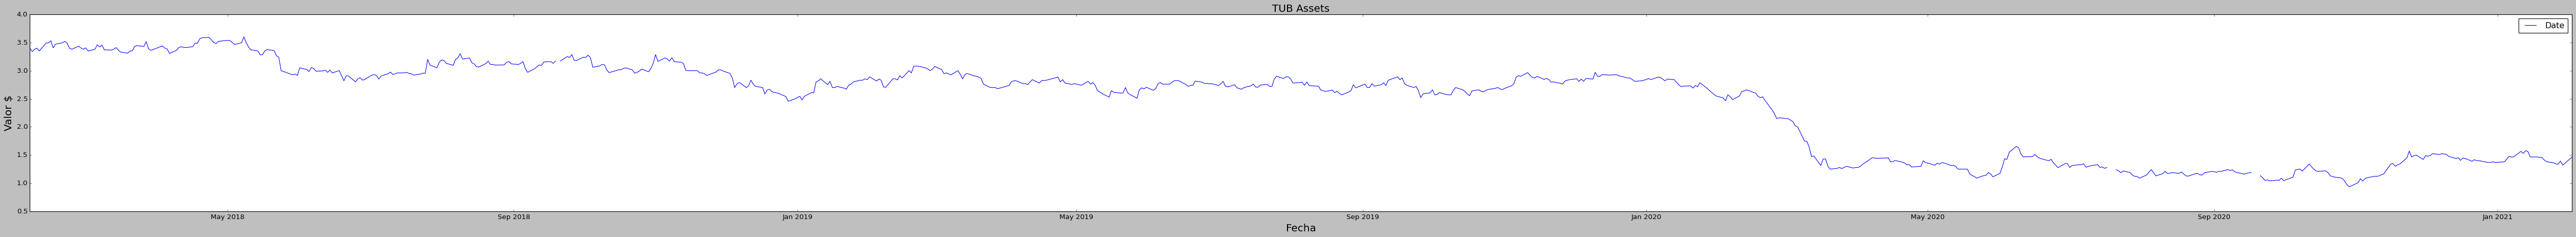

In [85]:
plt.figure(figsize=(80, 6))
plt.plot(df['Close'], label = 'Precio final', color = 'blue')
plt.title('TUB Assets', fontsize = 18)
plt.xlabel('Fecha', fontsize = 18)
plt.ylabel('Valor $', fontsize = 18)

plt.legend(df.columns.values, loc = 'upper right')

plt.show()

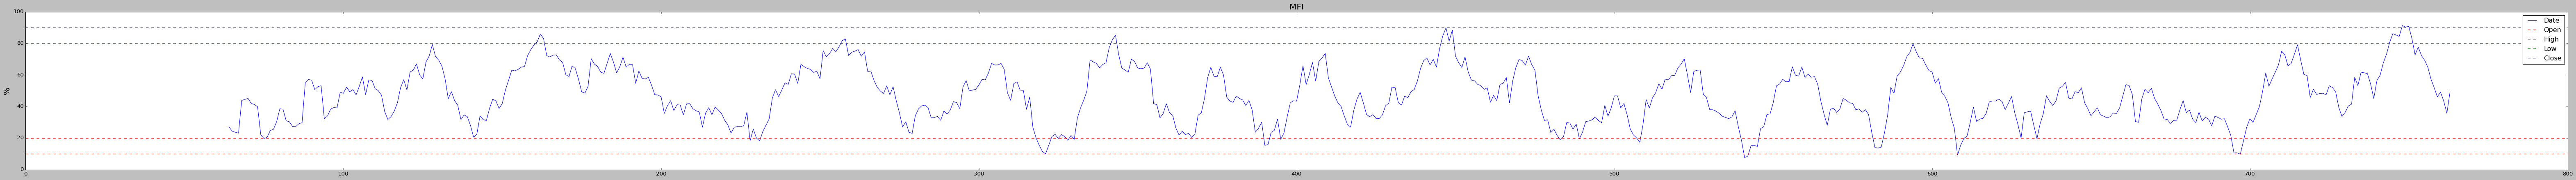

In [86]:
plt.figure(figsize=(100, 6))
plt.plot(df_mf2['Money Flow Index'], label = 'MFI', color = 'blue')
plt.title('MFI', fontsize = 18)
plt.ylabel('%', fontsize = 18)
plt.axhline(10, linestyle = '--', color = 'red')
plt.axhline(20, linestyle = '--', color = 'red')
plt.axhline(80, linestyle = '--', color = 'green')
plt.axhline(90, linestyle = '--', color = 'blue')

plt.legend(df.columns.values, loc = 'upper right')

plt.show()